In [64]:

# to data
from pykrx import stock
import pandas as pd

### 1. 테마 (인덱스) 고르기

In [65]:
tickers = stock.get_market_ticker_list("20240730")
print(tickers)

['095570', '006840', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K', '000120', '011150', '011155', '001045', '097950', '097955', '000480', '000590', '012030', '016610', '005830', '000990', '139130', '001530', '000210', '000215', '375500', '37550L', '37550K', '007340', '004840', '155660', '069730', '017860', '017940', '365550', '383220', '007700', '114090', '078930', '006360', '001250', '007070', '078935', '012630', '039570', '089470', '294870', '009540', '267250', '267270', '443060', '010620', '322000', '042670', '267260', '329180', '097230', '014790', '003580', '204320', '060980', '011200', '035000', '002460', '003560', '175330', '234080', '001060', '001067', '001065', '096760', '105560', '432320', '002380', '344820', '009070', '009440', '119650', '092220', '003620', '016380', '001390', '033180', '015590', '001940', '025000', '092230', '000040', '044450', '030200', '033780', '058850', '058860', '093050', '003550', '034220', '051900', '051905', '373220',

In [66]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('index_info.csv', dtype=str)

# 두 번째 칼럼만 선택 (0-based index)
second_column = df.iloc[:, 1]

# 결과 출력
print(second_column)


0                   코스피
1               코스피 대형주
2               코스피 중형주
3               코스피 소형주
4                  음식료품
5                  섬유의복
6                  종이목재
7                    화학
8                   의약품
9                 비금속광물
10                 철강금속
11                   기계
12                 전기전자
13                 의료정밀
14                 운수장비
15                  유통업
16                전기가스업
17                  건설업
18                운수창고업
19                  통신업
20                  금융업
21                   증권
22                   보험
23                 서비스업
24                  제조업
25              코스피 200
26              코스피 100
27               코스피 50
28    코스피 200 커뮤니케이션서비스
29           코스피 200 건설
30          코스피 200 중공업
31        코스피 200 철강/소재
32       코스피 200 에너지/화학
33         코스피 200 정보기술
34           코스피 200 금융
35        코스피 200 생활소비재
36        코스피 200 경기소비재
37          코스피 200 산업재
38         코스피 200 헬스케어
39         코스피 200 중소형주
40     코스피 200 초대형제외 지수
41     코스피 200 비

In [195]:
def indexId_to_index(index_id):
    df = pd.read_csv('index_info.csv', dtype=str)
    index = df[df['ticker'] == index_id]
    return str(index)
indexId_to_index(17)

'Empty DataFrame\nColumns: [ticker, name, corp_list]\nIndex: []'

### 2. 인덱스의 PER, PBR 찾기

In [115]:
from pykrx import stock

def get_index_PERnPBR(index_name):
    # CSV 파일 읽기
    df = pd.read_csv('index_info.csv', dtype=str)

    # name 컬럼이 "건설업"인 행 필터링
    filtered_rows = df[df['name'] == index_name]
    # print(filtered_rows)
    result = filtered_rows.iloc[0, 0]
    print(result)
    df = stock.get_index_fundamental("20240730", "20240730", str(result))
    print(df.head())

    return df.iloc[:, [2,3]]

get_index_PERnPBR("건설업")

1018
               종가   등락률        PER   PBR  배당수익률
날짜                                             
2024-07-30  74.73 -0.76  17.379999  0.45   1.96


,PER,PBR
날짜,,
2024-07-30,17.379999,0.45


In [80]:
get_index_PERnPBR("음식료품")

                 종가   등락률    PER   PBR  배당수익률
날짜                                           
2024-07-24  4505.23  0.68  12.95  0.99   1.53


,PER,PBR
날짜,,
2024-07-24,12.95,0.99


### 3. 인덱스에 해당하는 기업 리스트 조회하기

In [81]:
import pandas as pd

def get_corp_list_by_index(index_name):
    # CSV 파일 읽기
    df = pd.read_csv('index_info.csv', dtype=str)

    # name 컬럼이 "건설업"인 행 필터링
    filtered_rows = df[df['name'] == index_name]
    result = filtered_rows['corp_list'].values[0].split(',')

    return result

get_corp_list_by_index('건설업')

['000720',
 '051600',
 '047040',
 '006360',
 '009410',
 '294870',
 '375500',
 '475150',
 '001470',
 '126720',
 '097230',
 '039570',
 '003070',
 '028100',
 '002780',
 '002990',
 '013580',
 '005960',
 '034300',
 '002460',
 '014790',
 '010960',
 '013360',
 '004960',
 '001260',
 '013700',
 '023960',
 '002410',
 '010400']

### 4. 기업별 PER, PBR 찾기

In [103]:
from pykrx import stock
from pykrx import bond
import pandas as pd

def get_corp_PERnPBR_by_index(index_name):
    result = pd.DataFrame(columns=['corp_name', 'PER', 'PBR'])
    for stock_code in get_corp_list_by_index(index_name):
        # CSV 파일 읽기
        df = pd.read_csv('corp_info.csv', dtype=str)

        # 필터링
        filtered_rows = df[df['stock_code'] == stock_code]
        corp_name = filtered_rows['corp_name'].values[0]
        df = stock.get_market_fundamental("20240724", "20240724", stock_code)
        # print(df)
        if 'PER' in df.columns and 'PBR' in df.columns:
            new_row = pd.DataFrame({'corp_name': corp_name, 'PER': df['PER'][0], 'PBR': df['PBR'][0]}, index=[len(result)])
            result = pd.concat([result, new_row], ignore_index=True)
        # else:
        #     new_row = pd.DataFrame({'corp_name': corp_name, 'PER': "N/A", 'PBR': "N/A"}, index=[len(result)])
    return result

get_corp_PERnPBR_by_index('제조업')

,corp_name,PER,PBR
0,대덕전자,46.34,1.35
1,이수스페셜티케미컬,0.00,10.81
2,코오롱인더,28.86,0.40
3,미원상사,16.33,2.62
4,DL,0.00,0.32
...,...,...,...
60,세진중공업,30.35,2.88
61,STX엔진,102.28,1.82
62,LF,4.85,0.26
63,엠씨넥스,13.85,1.19


### 5. 시각화 - 저평가된 주식 찾기

In [116]:
target = "건설업"
index_PERnPBR = get_index_PERnPBR(target)
print(index_PERnPBR)
corp_PERnPBR = get_corp_PERnPBR_by_index(target)
print(corp_PERnPBR)

1018
               종가   등락률        PER   PBR  배당수익률
날짜                                             
2024-07-30  74.73 -0.76  17.379999  0.45   1.96
                  PER   PBR
날짜                         
2024-07-30  17.379999  0.45
    corp_name     PER   PBR
0        현대건설    6.72  0.44
1       한전KPS   10.77  1.38
2        대우건설    3.22  0.41
3        GS건설    0.00  0.35
4        태영건설    0.00  0.00
5   HDC현대산업개발    7.45  0.43
6       DL이앤씨    6.98  0.27
7      SK이터닉스    0.00  0.00
8        삼부토건    0.00  3.13
9     수산인더스트리    6.33  0.62
10      HJ중공업    0.00  0.85
11      HDC랩스   14.57  0.74
12     코오롱글로벌  803.85  0.37
13       동아지질   17.95  0.79
14       진흥기업    2.96  0.50
15       금호건설  119.19  0.28
16     계룡건설산업    2.76  0.16
17       동부건설    0.00  0.19
18      신세계건설    0.00  0.43
19       HS화성    3.96  0.22
20     HL D&I    6.58  0.25
21       삼호개발    5.16  0.34
22       일성건설   27.42  0.68
23       한신공영    2.47  0.10
24       남광토건   11.39  0.60
25      까뮤이앤씨   24.97  0.76
26   에쓰씨엔지니

##### 인덱스 per, pbr

In [97]:
index_PER = index_PERnPBR['PER'].values[0]
index_PBR = index_PERnPBR['PBR'].values[0]
print(index_PER, index_PBR)

16.68 0.43


##### 인덱스 구성 종목 평균 PER, PBR

In [98]:
index_mean_per = corp_PERnPBR['PER'].mean()
index_mean_pbr = corp_PERnPBR['PBR'].mean()

print(index_mean_per, index_mean_pbr)

37.84931034482759 0.5613793


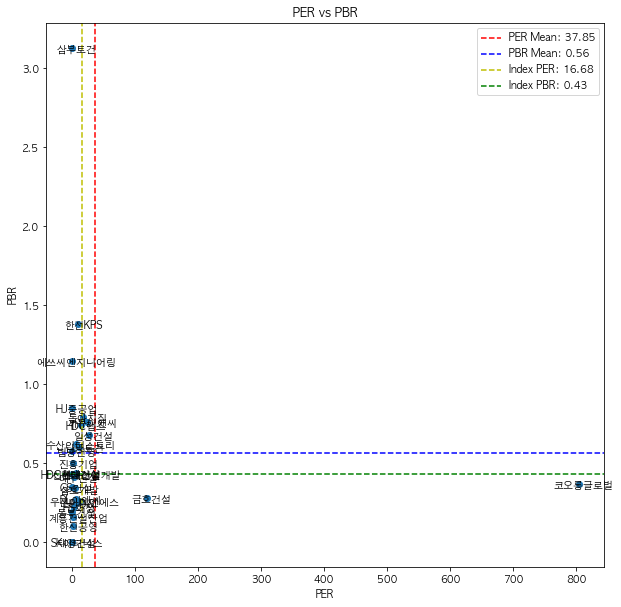

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# 산점도 그리기
plt.scatter(corp_PERnPBR['PER'], corp_PERnPBR['PBR'])
# 각 데이터 포인트에 이름 붙이기
for i, row in corp_PERnPBR.iterrows():
    plt.annotate(row['corp_name'], (row['PER'], row['PBR']), textcoords="offset points", xytext=(5,-5), ha='center')

# 평균값 선 그리기
plt.axvline(x=index_mean_per, color='r', linestyle='--', label=f'PER Mean: {index_mean_per:.2f}')
plt.axhline(y=index_mean_pbr, color='b', linestyle='--', label=f'PBR Mean: {index_mean_pbr:.2f}')
plt.axvline(x=index_PER, color='y', linestyle='--', label=f'Index PER: {index_PER:.2f}')
plt.axhline(y=index_PBR, color='g', linestyle='--', label=f'Index PBR: {index_PBR:.2f}')

plt.xlabel('PER')
plt.ylabel('PBR')
plt.title('PER vs PBR')
# 범례 추가
plt.legend()
plt.show()


##### 함수화

In [100]:
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt

def get_index_PERnPBR_visualization(target):
    index_PERnPBR = get_index_PERnPBR(target)

    corp_PERnPBR = get_corp_PERnPBR_by_index(target)

    index_PER = index_PERnPBR['PER'].values[0]
    index_PBR = index_PERnPBR['PBR'].values[0]

    index_mean_per = corp_PERnPBR['PER'].mean()
    index_mean_pbr = corp_PERnPBR['PBR'].mean()


    plt.figure(figsize=(10, 10))

    # 산점도 그리기
    plt.scatter(corp_PERnPBR['PER'], corp_PERnPBR['PBR'])
    # 각 데이터 포인트에 이름 붙이기
    for i, row in corp_PERnPBR.iterrows():
        plt.annotate(row['corp_name'], (row['PER'], row['PBR']), textcoords="offset points", xytext=(5,-5), ha='center')

    # 평균값 선 그리기
    plt.axvline(x=index_mean_per, color='r', linestyle='--', label=f'PER Mean: {index_mean_per:.2f}')
    plt.axhline(y=index_mean_pbr, color='b', linestyle='--', label=f'PBR Mean: {index_mean_pbr:.2f}')
    plt.axvline(x=index_PER, color='y', linestyle='--', label=f'Index PER: {index_PER:.2f}')
    plt.axhline(y=index_PBR, color='g', linestyle='--', label=f'Index PBR: {index_PBR:.2f}')

    plt.xlabel('PER')
    plt.ylabel('PBR')
    plt.title('PER vs PBR')
    # 범례 추가
    plt.legend()
    plt.show()


1027
                 종가   등락률    PER   PBR  배당수익률
날짜                                           
2024-07-30  7264.67 -0.97  25.67  1.24   1.43


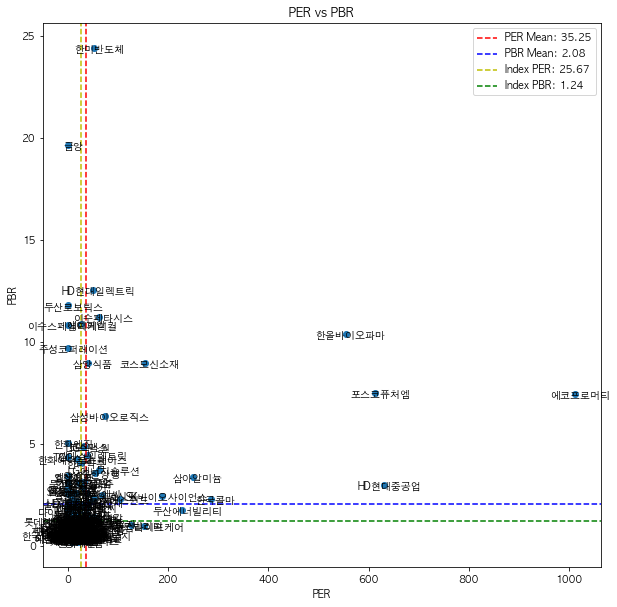

In [117]:
get_index_PERnPBR_visualization('제조업')

              PER   PBR
날짜                     
2024-07-24  10.45  0.48
   corp_name     PER   PBR
0     미래에셋증권   14.18  0.41
1     NH투자증권    8.50  0.62
2       삼성증권    7.33  0.61
3       키움증권    8.41  0.73
4       신영증권    5.94  0.38
5       대신증권    8.20  0.37
6     한화투자증권   89.52  0.52
7      유안타증권    9.90  0.38
8       교보증권    6.04  0.31
9       유진증권   15.69  0.48
10     현대차증권    5.52  0.27
11      SK증권   92.83  0.37
12      부국증권    3.96  0.30
13      한양증권    5.87  0.43
14    다올투자증권    0.00  0.33
15    DB금융투자   29.37  0.18
16      유화증권   18.61  0.27
17     상상인증권  124.40  0.28
10.45 0.48
25.237222222222222 0.40222228


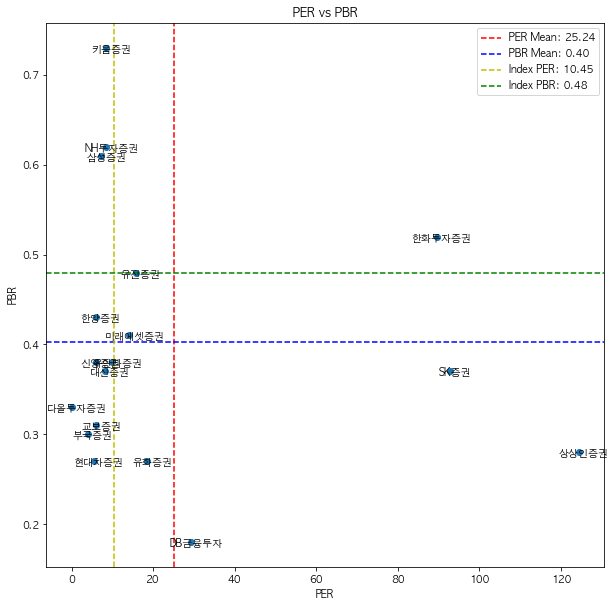

In [ ]:
get_index_PERnPBR_visualization('증권')

##### -> 생각보다 예외값이 있기도 하고... 웹으로 만들긴 해야겠다.

### 6. 저평가된 주식 - 재무상태 가져오기

##### Stock_code -> corp_code, corp_name 가져오기

In [164]:
def get_corpCode_from_stockCode(stock_code):
    # CSV 파일 읽기
    df = pd.read_csv('corp_info.csv', dtype='str')
    # print(df)
    # stock_code로 필터링
    filtered_rows = df[df['stock_code'] == stock_code]
    return str(filtered_rows["corp_code"].values[0])

get_corpCode_from_stockCode('005930')

'00126380'

In [165]:
import requests, json
def filter_and_transform(data):
    result = {}
    for item in data['list']:
        if item.get('fs_nm') == '연결재무제표':
            account_nm = "당기누적 " + item.get('account_nm', '')
            thstrm_add_amount = item.get('thstrm_amount', '')
            result[account_nm] = thstrm_add_amount
    return result


def get_corp_FI(stock_code):
    corp_code = get_corpCode_from_stockCode(stock_code)
    # API 키와 기본 URL 설정
    api_key = '18a4025554d765b6434de68f0e4dd1a1a0ffb5f8'

    account_url = 'https://opendart.fss.or.kr/api/fnlttSinglAcnt.json'
    # 요청 파라미터 설정
    params = {
        'crtfc_key': api_key,
        'corp_code': corp_code,  
        'bsns_year': '2023',      # 사업 연도
        'reprt_code': '11011',     # 1분기보고서 : 11013, 반기보고서 : 11012, 3분기보고서 : 11014, 사업보고서 : 11011
        'idx_cl_code' : "M210000" # 수익성지표 : M210000 안정성지표 : M220000 성장성지표 : M230000 활동성지표 : M240000
    }

    # API 호출
    response = requests.get(account_url, params=params)

    # 응답 데이터 처리
    if response.status_code == 200:
        data = response.json()
        # print(json.dumps(data, indent=4, ensure_ascii=False))
        return filter_and_transform(data)
    else:
        return f'Error: {response.status_cod}'

get_corp_FI('005930')


{'당기누적 유동자산': '195,936,557,000,000',
 '당기누적 비유동자산': '259,969,423,000,000',
 '당기누적 자산총계': '455,905,980,000,000',
 '당기누적 유동부채': '75,719,452,000,000',
 '당기누적 비유동부채': '16,508,663,000,000',
 '당기누적 부채총계': '92,228,115,000,000',
 '당기누적 자본금': '897,514,000,000',
 '당기누적 이익잉여금': '346,652,238,000,000',
 '당기누적 자본총계': '363,677,865,000,000',
 '당기누적 매출액': '258,935,494,000,000',
 '당기누적 영업이익': '6,566,976,000,000',
 '당기누적 법인세차감전 순이익': '11,006,265,000,000',
 '당기누적 당기순이익': '15,487,100,000,000',
 '당기누적 당기순이익(손실)': '15,487,100,000,000',
 '당기누적 총포괄손익': '18,837,411,000,000'}

- 이익 : 연결재무재표 - 당기순이익
- 매출 : 연결재무제표 - 매출액
- 부채 : 연결재무제표 - 부채총계
- 자산 : 연결재무제표 - 자산총계

In [154]:
def get_corpCode_from_corpName(corp_name):
    # CSV 파일 읽기
    df = pd.read_csv("corp_info.csv", dtype="str")
    # print(df)
    # stock_code로 필터링
    filtered_rows = df[df["corp_name"] == corp_name]
    return str(filtered_rows.iloc[0,1])

get_corpCode_from_corpName("삼성전자")


'00126380'

In [174]:
import requests, json

def get_corpCode_from_corpName(corp_name):
    # CSV 파일 읽기
    df = pd.read_csv("corp_info.csv", dtype="str")
    # print(df)
    # stock_code로 필터링
    filtered_rows = df[df["corp_name"] == corp_name]
    return str(filtered_rows.iloc[0,1])

def filter_and_transform(data):
    result = {}
    for item in data["list"]:
        if item.get("fs_nm") == "연결재무제표":
            account_nm = "당기누적 " + item.get("account_nm", "")
            thstrm_add_amount = item.get("thstrm_amount", "")
            result[account_nm] = thstrm_add_amount
    return result


def get_corp_FI(corp_name):
    corp_code = get_corpCode_from_corpName(corp_name)
    
    # API 키와 기본 URL 설정
    api_key = '18a4025554d765b6434de68f0e4dd1a1a0ffb5f8'

    account_url = "https://opendart.fss.or.kr/api/fnlttSinglAcnt.json"
    # 요청 파라미터 설정
    params = {
        "crtfc_key": api_key,
        "corp_code": corp_code,
        "bsns_year": "2023",  # 사업 연도
        "reprt_code": "11011",  # 1분기보고서 : 11013, 반기보고서 : 11012, 3분기보고서 : 11014, 사업보고서 : 11011
        "idx_cl_code": "M210000",  # 수익성지표 : M210000 안정성지표 : M220000 성장성지표 : M230000 활동성지표 : M240000
    }

    # API 호출
    response = requests.get(account_url, params=params)

    # 응답 데이터 처리
    if response.status_code == 200:
        data = response.json()
        # print(json.dumps(data, indent=4, ensure_ascii=False))
        return filter_and_transform(data)
    else:
        return f"Error: {response.status_code}"
    
get_corp_FI('삼양식품')

{'당기누적 유동자산': '492,073,951,173',
 '당기누적 비유동자산': '672,964,144,204',
 '당기누적 자산총계': '1,170,302,770,895',
 '당기누적 유동부채': '402,005,197,765',
 '당기누적 비유동부채': '191,507,257,017',
 '당기누적 부채총계': '593,512,454,782',
 '당기누적 자본금': '37,665,075,000',
 '당기누적 이익잉여금': '522,208,620,322',
 '당기누적 자본총계': '576,790,316,113',
 '당기누적 매출액': '1,192,914,607,980',
 '당기누적 영업이익': '147,514,090,779',
 '당기누적 법인세차감전 순이익': '156,325,436,987',
 '당기누적 당기순이익': '126,591,199,633',
 '당기누적 당기순이익(손실)': '126,591,199,633',
 '당기누적 총포괄손익': '124,173,498,785'}

In [181]:
def get_corpName_from_stockcode(stock_code):
    df = pd.read_csv("corp_info.csv", dtype="str")
    filtered_rows = df[df["stock_code"] == stock_code]
    # print(filtered_rows)
    return filtered_rows.iloc[0,2]

def get_stockcode_from_corpName(corp_name):
    df = pd.read_csv("corp_info.csv", dtype="str")
    filtered_rows = df[df["corp_name"] == corp_name]
    # print(filtered_rows)
    return str(filtered_rows.iloc[0,0])
get_stockcode_from_corpName("삼성전자")


'005930'

### 7. 저평가된 주식 - 임원 현황 가져오기

In [121]:
import requests, json

def extract_execute_from_dict(data):
    result = []
    for item in data['list']:
        chrg_job = item.get('chrg_job', '')
        nm = item.get('nm', '')
        main_career = item.get('main_career', '')
        transformed_string = f"{chrg_job} - {nm} ({main_career})"
        result.append(transformed_string)
    return result

def get_corp_execs(stock_code):
    corp_code = get_corpCode_from_stockCode(stock_code)
    # API 키와 기본 URL 설정
    api_key = '18a4025554d765b6434de68f0e4dd1a1a0ffb5f8'

    url = 'https://opendart.fss.or.kr/api/exctvSttus.json'

    # 요청 파라미터 설정
    params = {
        'crtfc_key': api_key,
        'corp_code': str(corp_code),  # 예시: 삼성전자
        'bsns_year': '2023',      # 사업 연도
        'reprt_code': '11011'     # 반기 보고서
    }

    # API 호출
    response = requests.get(url, params=params)

    # 응답 데이터 처리
    if response.status_code == 200:
        data = response.json()
        # JSON 데이터를 보기 좋게 출력
        # print(json.dumps(data, indent=4, ensure_ascii=False))
        return extract_execute_from_dict(data)
    else:
        return f'Error: {response.status_code}'

get_corp_execs('005930')

['ㆍ대표이사   (DX 부문 경영전반 총괄) - 한종희 (ㆍ인하대 전자공학 학사ㆍ삼성전자 DX부문장)',
 'ㆍ사외이사후보추천위원회 위원\nㆍ지속가능경영위원회 위원 - 허은녕 (ㆍPennsylvania State대\n   자원경제학 박사\nㆍ서울대 공과대학 교수)',
 'ㆍ사외이사후보추천위원회 위원\nㆍ지속가능경영위원회 위원 - 유명희 (ㆍVanderbilt대 법학 박사\nㆍ서울대 국제대학원 객원교수)',
 'ㆍ대표이사   (DS 부문 경영전반 총괄) - 경계현 (ㆍ서울대 제어계측공학 박사\nㆍ삼성전자 DS부문장)',
 'ㆍMX사업부장 - 노태문 (ㆍ포항공대 전자전기공학 박사ㆍ삼성전자 MX사업부장)',
 'ㆍCFO - 박학규 (ㆍKAIST 경영학 석사\nㆍ삼성전자 경영지원실장)',
 'ㆍ메모리사업부장 - 이정배 (ㆍ서울대 전자공학 박사ㆍ삼성전자 메모리사업부장)',
 'ㆍ이사회 의장\nㆍ감사위원회 위원장\nㆍ내부거래위원회 위원\nㆍ보상위원회 위원\nㆍ지속가능경영위원회 위원장 - 김한조 (ㆍ연세대 불어불문학 학사ㆍ하나금융나눔재단 이사장)',
 'ㆍ감사위원회 위원\nㆍ내부거래위원회 위원장\nㆍ사외이사후보추천위원회 위원\nㆍ지속가능경영위원회 위원 - 김선욱 (ㆍKonstanz대 법학 박사ㆍ이화여대 명예교수)',
 'ㆍ감사위원회 위원\nㆍ내부거래위원회 위원\nㆍ보상위원회 위원장\nㆍ지속가능경영위원회 위원 - 김종훈 (ㆍMaryland대 신뢰성공학 박사ㆍKiswe Mobile 회장)',
 'ㆍ보상위원회 위원\nㆍ지속가능경영위원회 위원 - 김준성 (ㆍCarnegie Mellon대 \n   경제학/산업공학 학사\nㆍ싱가포르투자청 토탈리턴그룹 이사)']

### 8. 저평가된 주식 - 성장가능성 가져오기 (인덱스 반영)

### 9. 저평가된 주식 - 산업 전망 가져오기 (인덱스 반영)

### 10. Naver Clova X을 워랜버핏으로 만들어서 물어보기

In [161]:
def get_corp_stockNperNpbr(stock_code):
    row1 = stock.get_market_fundamental("20240730", "20240730", str(stock_code))
    row2 = stock.get_market_ohlcv("20240730", "20240730", "005930")
    new_row = {"시가" : row2['시가'][0], 'PER': row1['PER'][0], 'PBR': row1['PBR'][0]}
    return new_row

get_corp_stockNperNpbr('005930')

{'시가': 80400, 'PER': 38.01, 'PBR': 1.56}

In [182]:
# -*- coding: utf-8 -*-

import requests, json
def bytes_to_dict(line):
    # 바이트 데이터를 문자열로 변환
    # "data:"로 시작하는 부분 제거
    json_string = line.split('data:')[1].strip()
    # print(json_string)
    # JSON 문자열을 딕셔너리로 변환
    json_dict = json.loads(json_string)
    
    return json_dict['message']['content']

class CompletionExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def execute(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8',
            'Accept': 'text/event-stream'
        }

        with requests.post(self._host + '/testapp/v1/chat-completions/HCX-003',
                           headers=headers, json=completion_request, stream=True) as r:
            for line in r.iter_lines():
                if line:
                    line = line.decode('utf-8')
                    # if line.startswith('data:') and 'message' in line:
                    #     line = bytes_to_dict(line)
                    print(line)


if __name__ == '__main__':
    completion_executor = CompletionExecutor(
        host='https://clovastudio.stream.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY/YCNsEMs/lMRuAiOAuNu0Okq3LxuJz0eFNI+ZlmGT0L',
        api_key_primary_val='VZJ01Omlxv3X8bwVfgsAH1vGGp5B5SAbkDbAJEs5',
        request_id='53684609-708c-4dc6-a769-0a96c28afa12'
    )
    # replace to input
    index = '제조업'
    corp_name = '삼성전자'
 
    # get account info
    stock_code = get_stockcode_from_corpName(corp_name)
    account = get_corp_FI(corp_name)
    # get board members
    stocks = get_corp_stockNperNpbr(stock_code)
    board_members = get_corp_execs(stock_code)

    query = f"이 기업의 이름은 {corp_name}이며 산업군은 {index}입니다.\n\n\n재무상태는 다음과 같습니다.{stock}\n{account}  \n\n\n경영진 정보는 다음과 같습니다.\n이사회: {board_members}\n\n\n이 데이터를 분석하여 이 회사가 좋은 투자 기회인지 판단해 주세요. 추천 이유를 상세히 설명해 주세요.\n 다음 양식에 따라 답변해주세요. \n 투자 여부 판단 : 좋음 / 보통 / 나쁨 \n 이유 : "
    preset_text = [{"role":"system","content":"당신은 금융 분석 및 투자 조언에 특화된 AI 어시스턴트입니다. 회사의 산업 분류, 재무 상태, 경영진 정보가 제공될 것입니다. 이 데이터를 기반으로 주식이 좋은 투자 기회인지 여부를 판단하십시오. 상세한 분석과 추천 이유를 제공하세요."},
                   {"role":"user","content":query}]
    request_data = {

        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 256,
        'temperature': 0.5,
        'repeatPenalty': 5.0,
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 0
    }

    completion_executor.execute(request_data)


id:69ff45ff-f007-47af-a8e3-df715eb307f5
event:token
data:{"message":{"role":"assistant","content":"투자"},"index":0,"inputLength":911,"outputLength":1,"stopReason":null}
id:8ca04f4f-930b-466c-9093-f870ae8bb60f
event:token
data:{"message":{"role":"assistant","content":" 여부"},"index":0,"inputLength":911,"outputLength":1,"stopReason":null}
id:d3427753-ce12-4b10-bd2a-ee1bebcaeb47
event:token
data:{"message":{"role":"assistant","content":" 판단"},"index":0,"inputLength":911,"outputLength":1,"stopReason":null}
id:2d31acdd-6f50-4b34-9705-f98d132686a6
event:token
data:{"message":{"role":"assistant","content":" :"},"index":0,"inputLength":911,"outputLength":1,"stopReason":null}
id:5bc8a6de-b555-4236-beb3-9f9aeeecf82b
event:token
data:{"message":{"role":"assistant","content":" 좋음"},"index":0,"inputLength":911,"outputLength":1,"stopReason":null}
id:fcf60f20-fb79-44a9-91b8-83a1946e374d
event:token
data:{"message":{"role":"assistant","content":"\n"},"index":0,"inputLength":911,"outputLength":1,"stopRea

In [199]:
def bytes_to_dict(line):
    # 바이트 데이터를 문자열로 변환
    # "data:"로 시작하는 부분 제거
    json_string = line.split('data:')[1].strip()
    # print(json_string)
    # JSON 문자열을 딕셔너리로 변환
    json_dict = json.loads(json_string)
    
    return json_dict['message']['content']

class CompletionExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def execute(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8',
            'Accept': 'text/event-stream'
        }

        with requests.post(self._host + '/testapp/v1/chat-completions/HCX-003',
                           headers=headers, json=completion_request, stream=True) as r:
            for line in r.iter_lines():
                if line:
                    line = line.decode('utf-8')
                    if line.startswith('data:') and 'message' in line:
                        line = bytes_to_dict(line)
                        # if line.startswith('\n'):
                        #     print(line,)
                        print(line, end='')

def analyze_company(index, corp_name):
    completion_executor = CompletionExecutor(
        host='https://clovastudio.stream.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY/YCNsEMs/lMRuAiOAuNu0Okq3LxuJz0eFNI+ZlmGT0L',
        api_key_primary_val='VZJ01Omlxv3X8bwVfgsAH1vGGp5B5SAbkDbAJEs5',
        request_id='53684609-708c-4dc6-a769-0a96c28afa12'
    )

    # get account info
    stock_code = get_stockcode_from_corpName(corp_name)
    account = get_corp_FI(corp_name)
    # get board members
    stocks = get_corp_stockNperNpbr(stock_code)
    board_members = get_corp_execs(stock_code)
    
    query = f"이 기업의 이름은 {corp_name}이며 산업군은 {index}입니다.\n\n\n재무상태는 다음과 같습니다.\n{stocks}\n{account}  \n\n\n경영진 정보는 다음과 같습니다.\n이사회: {board_members}\n\n\n이 데이터를 분석하여 이 회사가 좋은 투자 기회인지 판단해 주세요. 추천 이유를 상세히 설명해 주세요.\n 다음 양식에 따라 답변해주세요. \n 투자 여부 판단 : 좋음 / 보통 / 나쁨 \n 이유 : "
    preset_text = [{"role":"system","content":"당신은 금융 분석 및 투자 조언에 특화된 AI 어시스턴트입니다. 회사의 산업 분류, 재무 상태, 경영진 정보가 제공될 것입니다. 이 데이터를 기반으로 주식이 좋은 투자 기회인지 여부를 판단하십시오. 상세한 분석과 추천 이유를 제공하세요."},
                   {"role":"user","content":query}]
    # print(query)
    request_data = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 256,
        'temperature': 0.5,
        'repeatPenalty': 5.0,
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 0
    }

    completion_executor.execute(request_data)

# 테스트 실행
analyze_company("제조업", "삼성전자")

투자 여부 판단 : 좋음

이유 : 시가총액 400조 이상의 대한민국 대표 기업인 삼성전자는 다양한 사업 분야에서 높은 경쟁력을 보유하고 있으며 안정적인 재무구조와 꾸준한 실적 성장세를 보이고 있습니다. PER 지표가 다소 높게 나타나기는 하지만 PBR도 적정 수준을 유지하고 있고, 특히 최근에는 반도체 시장의 호황으로 인해 DS 부문의 실적이 크게 개선되고 있어 긍정적인 투자 전망을 가지고 있습니다. 또한, 경영진 구성도 전문성과 다양성을 갖추고 있어 회사의 지속 가능한 성장을 위한 전략적 의사결정을 내릴 수 있을 것으로 기대됩니다. 따라서, 삼성전자는 장기적인 관점에서 매력적인 투자 기회로 판단됩니다.투자 여부 판단 : 좋음

이유 : 시가총액 400조 이상의 대한민국 대표 기업인 삼성전자는 다양한 사업 분야에서 높은 경쟁력을 보유하고 있으며 안정적인 재무구조와 꾸준한 실적 성장세를 보이고 있습니다. PER 지표가 다소 높게 나타나기는 하지만 PBR도 적정 수준을 유지하고 있고, 특히 최근에는 반도체 시장의 호황으로 인해 DS 부문의 실적이 크게 개선되고 있어 긍정적인 투자 전망을 가지고 있습니다. 또한, 경영진 구성도 전문성과 다양성을 갖추고 있어 회사의 지속 가능한 성장을 위한 전략적 의사결정을 내릴 수 있을 것으로 기대됩니다. 따라서, 삼성전자는 장기적인 관점에서 매력적인 투자 기회로 판단됩니다.

### 11. 웹으로 만들기